# CONTOH: One-against-one


Dalam pendekatan ini, alih-alih mencoba membedakan satu kelas dari yang lain, kita berusaha membedakan satu kelas dengan kelas yang lain. Sebagai hasilnya, kami melatih satu classifier per pasangan kelas, yang mengarah ke klasifikasi K (K-1) / 2 untuk kelas K. Setiap classifier dilatih pada subkumpulan data dan menghasilkan batas keputusannya sendiri. Prediksi dilakukan dengan menggunakan strategi voting sederhana. Setiap contoh yang ingin kita prediksi dilewatkan ke masing-masing classifier, dan kelas yang diprediksi direkam. Kemudian, kelas yang memiliki suara terbanyak diberikan pada contoh.

In [18]:
import numpy as np 
from sklearn import svm
from itertools import combinations 
from scipy.stats import mode 

def load_X():
	return np.array([[1, 6], [1, 7], [2, 5], [2, 8], 
					[4, 2], [4, 3], [5, 1], [5, 2], 
					[5, 3], [6, 1], [6, 2], [9, 4], 
					[9, 7], [10, 5], [10, 6], [11, 6], 
					[5, 9], [5, 10], [5, 11], [6, 9], 
					[6, 10], [7, 10], [8, 11]]) 

def load_y(): 
	return np.array([1, 1, 1, 1, 
		2, 2, 2, 2, 2, 2, 2, 
		3, 3, 3, 3, 
		4, 4, 4, 4, 4, 4, 4])


In [20]:
# Predict the class having the max number of votes. 
def predict_class(X, classifiers, class_pairs):
    predictions = np.zeros((X.shape[0], len(classifiers)))
    for idx, clf in enumerate(classifiers):
        class_pair = class_pairs[idx] 
        prediction = clf.predict(X) 
        predictions[:, idx] = np.where(prediction == 1, class_pair[0], class_pair[1]) 
    return mode(predictions, axis=1)[0].ravel().astype(int)

X = load_X()
y = load_y() 
# Create datasets. 
training_data = [] 
class_pairs = list(combinations(set(y), 2)) 
for class_pair in class_pairs:
    class_mask = np.where((y == class_pair[0]) | (y == class_pair[1])) 
    y_i = np.where(y[class_mask] == class_pair[0], 1, -1) 
    training_data.append((X[class_mask], y_i)) 
    
    
# Train one classifier per class.
classifiers = [] 
for data in training_data:
    clf = svm.SVC(kernel='linear', C=1000) 
    clf.fit(data[0], data[1]) 
    classifiers.append(clf) 
    
# Make predictions on two examples. 
X_to_predict = np.array([[5,5],[2,5]]) 
print(predict_class(X_to_predict, classifiers, class_pairs))

[2 1]


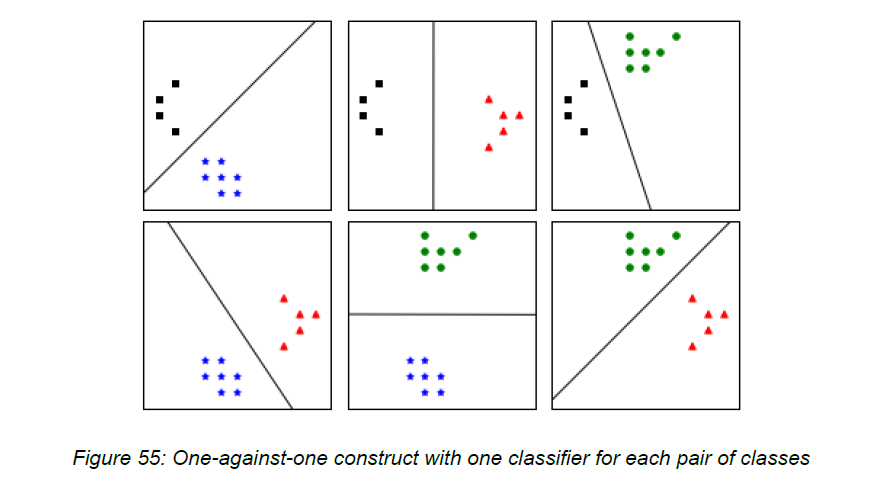

In [34]:
from IPython.display import Image
Image(filename='gb0.PNG')

Dengan pendekatan ini, kita masih dihadapkan dengan masalah klasifikasi yang ambigu. Jika dua kelas memiliki jumlah suara yang sama, disarankan agar memilih yang memiliki indeks lebih kecil mungkin merupakan strategi yang layak (walaupun mungkin bukan yang terbaik) (Hsu & Lin, A Comparison of Methods for Multi-class Support Vector Machines, 2002).

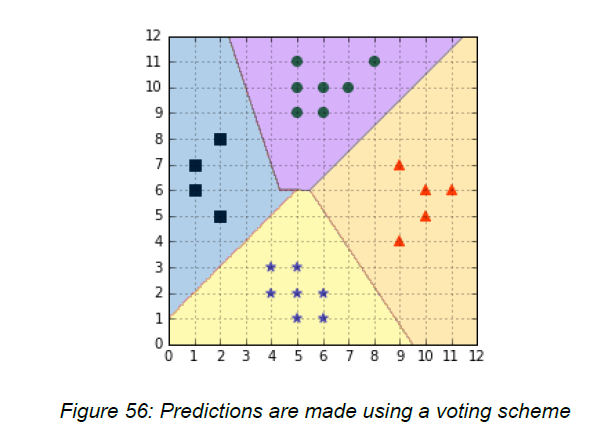

In [33]:
Image(filename='gb1.png')

Gambar menunjukkan bahwa daerah keputusan yang dihasilkan oleh strategi satu lawan satu berbeda dari yang dihasilkan oleh satu lawan satu (Gambar). Dalam Gambar, menarik untuk dicatat bahwa untuk daerah yang dihasilkan oleh pengklasifikasi satu lawan satu, wilayah akan mengubah warnanya hanya setelah melintasi hyperplane (dilambangkan dengan garis hitam), sementara ini tidak terjadi pada satu lawan satu. .

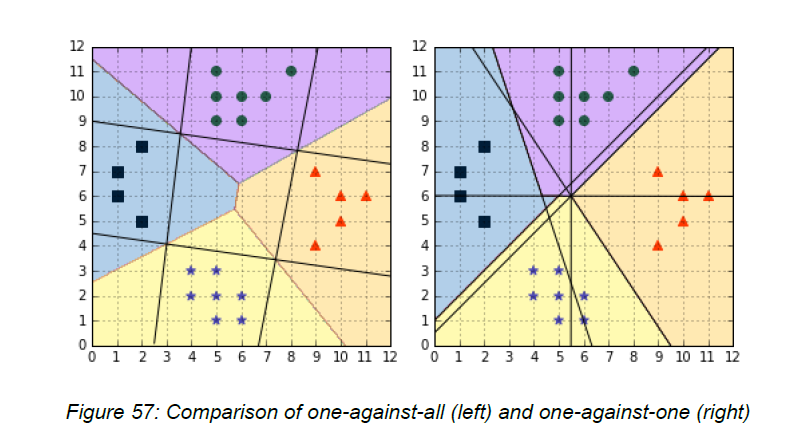

In [32]:
Image(filename='gb2.png')

Pendekatan one-against-one adalah pendekatan default untuk klasifikasi multi kelas yang digunakan dalam sklearn. Alih-alih Kode 1, Anda akan mendapatkan hasil yang sama persis dengan menggunakan kode Kode 2.

In [31]:
# from sklearn import svm 
# import numpy as np 
# X = load_X() 
# y = load_y()

# # Train a multi-class classifier. 
# clf = svm.SVC(kernel='linear', C=1000) 
# clf.fit(X,y) 

# # Make predictions on two examples. 
# X_to_predict = np.array([[5,5],[2,5]]) 
# print(clf.predict(X_to_predict)) 
# # prints [2 1]

Salah satu kelemahan utama metode one-against-all adalah bahwa classifier akan cenderung overfit. Selain itu, ukuran pengklasifikasi tumbuh secara super linier dengan jumlah kelas, jadi metode ini akan lambat untuk masalah besar (Platt, Cristianini, & Shawe-Taylor, 2000).

Referensi : 
Alexandre Kowalczyk.2017.Support Vector Machine.Syncfusion, Inc. 2501 Aerial Center Parkway Suite 200 Morrisville, NC 27560 USA